# Visualizing results

In [1]:
cd /home

/home


In [2]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd
import numpy as np
import toml
import wandb
import toml
import glob
import os

from src.data.loaders import get_loader

%load_ext autoreload
%autoreload 2

2023-10-25 20:44:30.519765: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Loading data

In [29]:
loader = get_loader('./data/records/atlas/fold_0/atlas/train/',
                   batch_size=16,
                   window_size=200,
                   probed_frac=.5,
                   random_frac=.2,
                   nsp_prob=.5,
                   sampling=True,
                   shuffle=False,
                   repeat=1,
                   num_cls=None,
                   normalize='zero-mean', # 'minmax'
                   cache=False,
                   return_ids=False,
                   return_lengths=False,
                   aversion='2')

[INFO] Repeating dataset x1 times
[INFO] Sampling random windows
[INFO] Loading PT task: Masking
[INFO] NSP format activated


tf.Tensor(
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.], shape=(200,), dtype=float32)


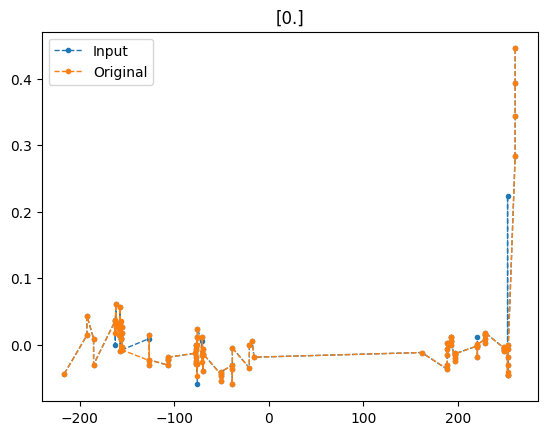

In [33]:
for x, y in loader.take(1):
    seg = x['seg_emb']-1
    
    x_inp = tf.boolean_mask(x['magnitudes'][0], 1.-x['att_mask'][0])
    y_inp = tf.boolean_mask(y['magnitudes'][0], 1.-x['att_mask'][0])
    t_inp = tf.boolean_mask(x['times'][0], 1.-x['att_mask'][0])
    
    print(x['seg_emb'][0])

    
    plt.plot(t_inp, x_inp, marker='.', label='Input', linewidth=1, linestyle='--')
    plt.plot(t_inp, y_inp, marker='.', label='Original', linewidth=1, linestyle='--')

    plt.title('{}'.format(y['nsp_label'][0]))

    plt.legend()

In [452]:
# from src.data.nsp import randomize

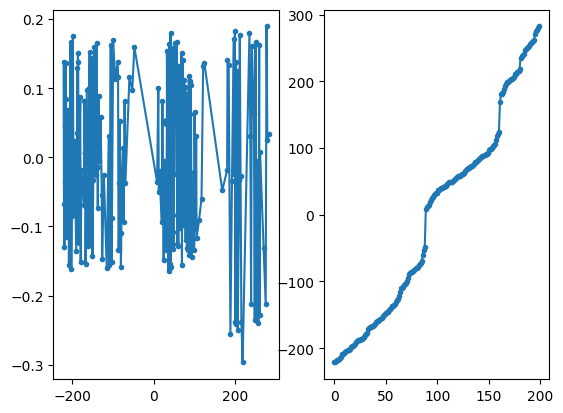

In [453]:
# for x in loader.take(1):
#     out, to = randomize(x, nsp_prob=1.)
#     yy = tf.boolean_mask(out['nsp_magnitudes'][0,...,0], out['nsp_pad_mask'][0])
#     xx = tf.boolean_mask(out['nsp_times'][0,...,0], out['nsp_pad_mask'][0])

    
#     N=99
#     fig, axes = plt.subplots(1, 2)
#     axes[0].scatter(xx[N], yy[N])
#     axes[0].plot(xx, yy, marker='.')
#     axes[1].plot(xx, marker='.')

In [60]:
oo[0]

<tf.Tensor: shape=(200,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, Fal

In [64]:
out['nsp_pad_mask'][0]

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>